In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pathlib import Path
sys.path.append(str(Path().absolute().parent))

from choseg.metrics import choroid_utils
from choseg import utils

--- 
## Visual demonstration of the Pixel GUI

Here is a step-by-step guide (with figures) on the process of selecting pixels using the simple gui found in `choseg/metrics/pixel_gui.py`.

Let's load in an OCT scan from `oct-choroid-region-seg/example_data`

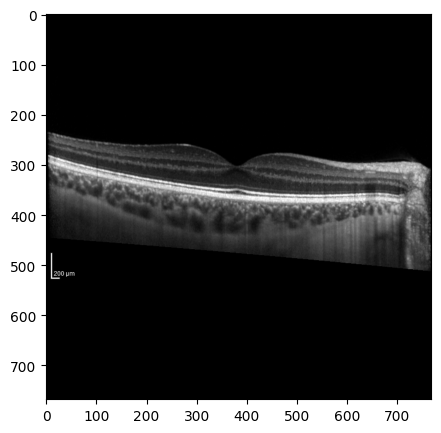

In [2]:
img_path = Path("example_data/image1.png")
image = utils.load_img(img_path)
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.imshow(image, cmap="gray")

---

### `choroid_utils.select_pixels` class arguments

The arguments for selecting pixels using `select_pixels(...)` are:

- `image` (`str` or `np.array`) : Filepath to image or numpy array representing image.

- `scale` (`int`) : Scale factor to aid showing image on screen. Useful depending on if using Laptop or Desktop.

- `save_path` (`str`) : Path to directory to save selected pixels.

- `fname` (`str`) : Filename to save selected pixels.

- `cmap` (`opencv-colormap`) : opencv-python colormap, default is cv2.COLORMAP_JET. If None, then Gray is used.

### Functionality

The simple pixel GUI provides the following functionality:

- The mouse can be used to hover over pixels and their coordinate and location appear real-time on the `main window`.

- Hovering over a pixel in the main window and `scroll-forward` once opens a `zoomed window` to the right of the `main window`.
    - This window is centred at this pixels and 50 pixels in vertical and horizontal directions.
    
- We can `scroll-forward` at a different location on the `main window` and this will replace the `zoomed window` at the previous location to the new location. 
    
- We can hover over the `zoomed window` for a pixel to select, which is highlighted as a white square.
    - The coordinate of the pixel hovered over on the `zoomed window` at any time is shown on the `main window`.
    
- To remove the `zoomed window`, place cursor on the `main window` and `scroll-back` on mouse. 
    
- We can select a single pixels or a set of pixels using the `left-click` of the mouse, either on the `main window` or `zoomed window`.

- We can remove all selected pixels and restart selection by using the `right-click` of the mouse. 

- If we are happy with selection, hold `ctrl` and a single `left-click` will save those selected pixels to the `fname` specified to the `save_path` directory.

- Once finished, use `esc` or `enter` to escape from the GUI.

### Instantiation

Instantiate the pixel GUI class such as the line below as

`select = choroid_utils.select_pixels(image, scale=1000, save_path=sys.path[0], fname="demo_GUI", cmap=None)`

In [3]:
select = choroid_utils.select_pixels(image, scale=600, save_path="example_data", fname="demo_GUI", cmap=None)

---
## Run

There are no arguments when calling the GUI, so just write `select()`. 

In [4]:
select()

---

### Visual demo

Below shows an execution of the pixel GUI to select the fovea coordinate on the OCT B-scan.

In [ ]:
def display_gui_fig(img_no):
    gui_fig_path = Path(f"gui_figs/fig{img_no}.png")
    gui = utils.load_img(gui_fig_path)
    
    fig, ax = plt.subplots(1,1,figsize=(15,10))
    ax.imshow(gui)
    ax.set_axis_off()

1. Running the cell will (some of the time) automatically bring the `main window` up on the screen. Otherwise, you can click the `cv2` window from your computer's task bar.

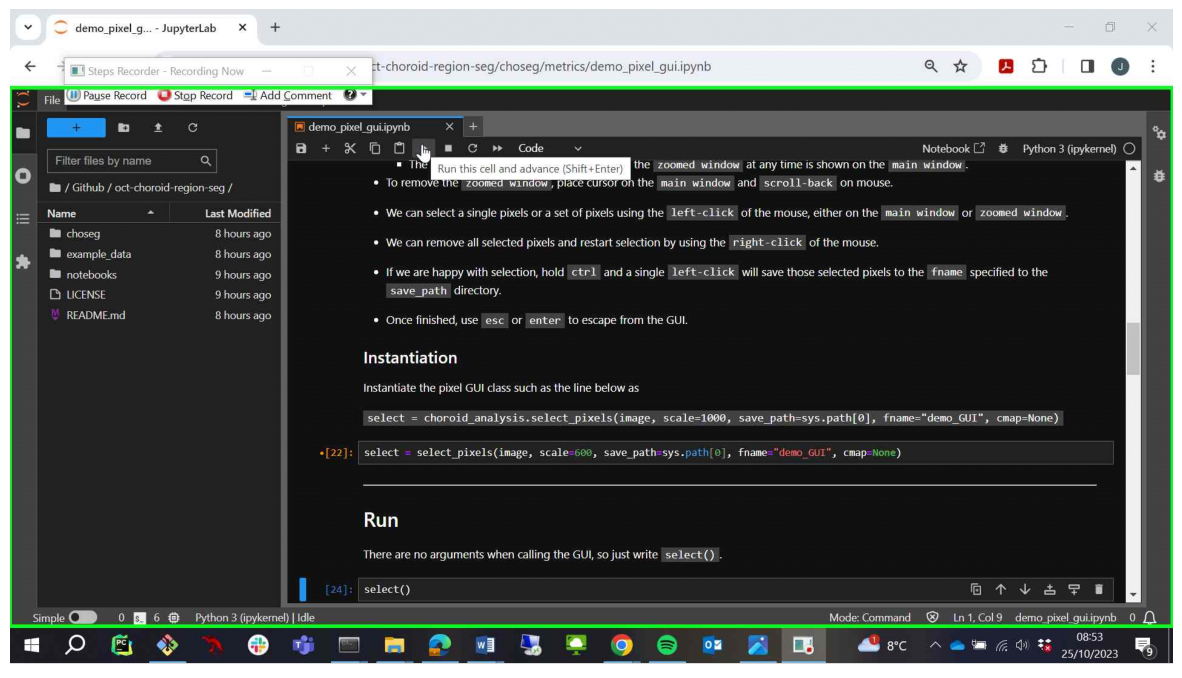

In [5]:
display_gui_fig(img_no=1)

2. We can hover over the general location of the fovea on the OCT B-scan. 
    - **Note** the centre of the cross defines what pixel is currently being selected.

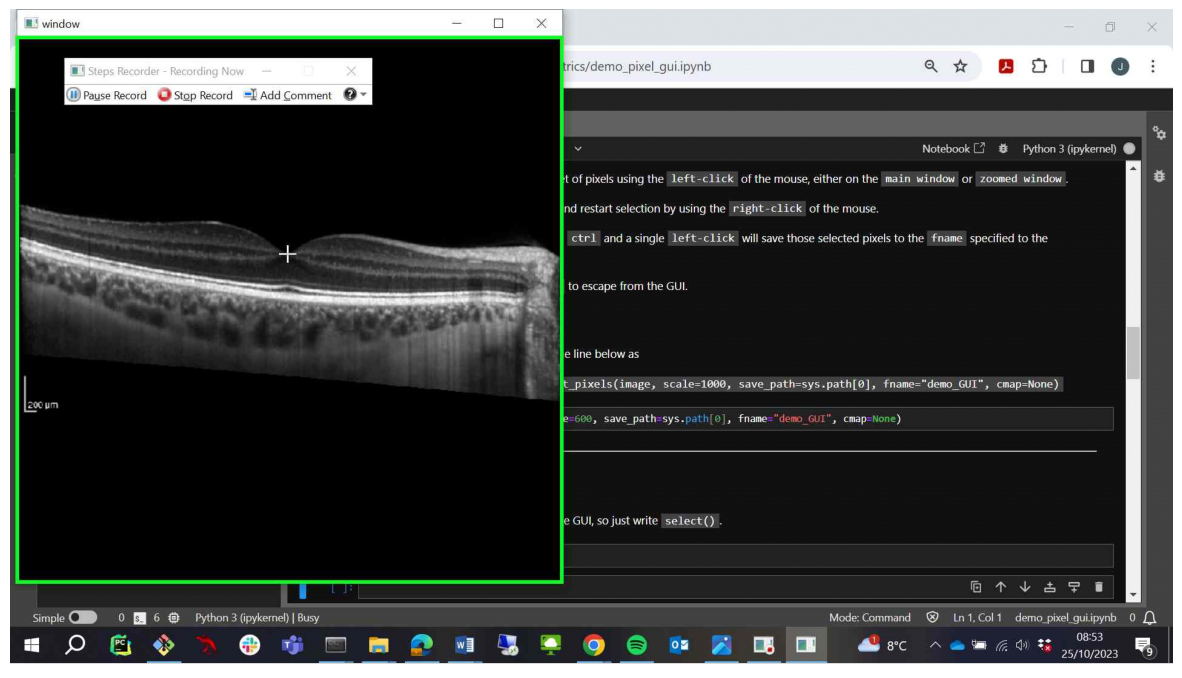

In [6]:
display_gui_fig(img_no=2)

3. We use `scroll-forward` to zoom into this region to select the coordinate of the fovea with more precision. 

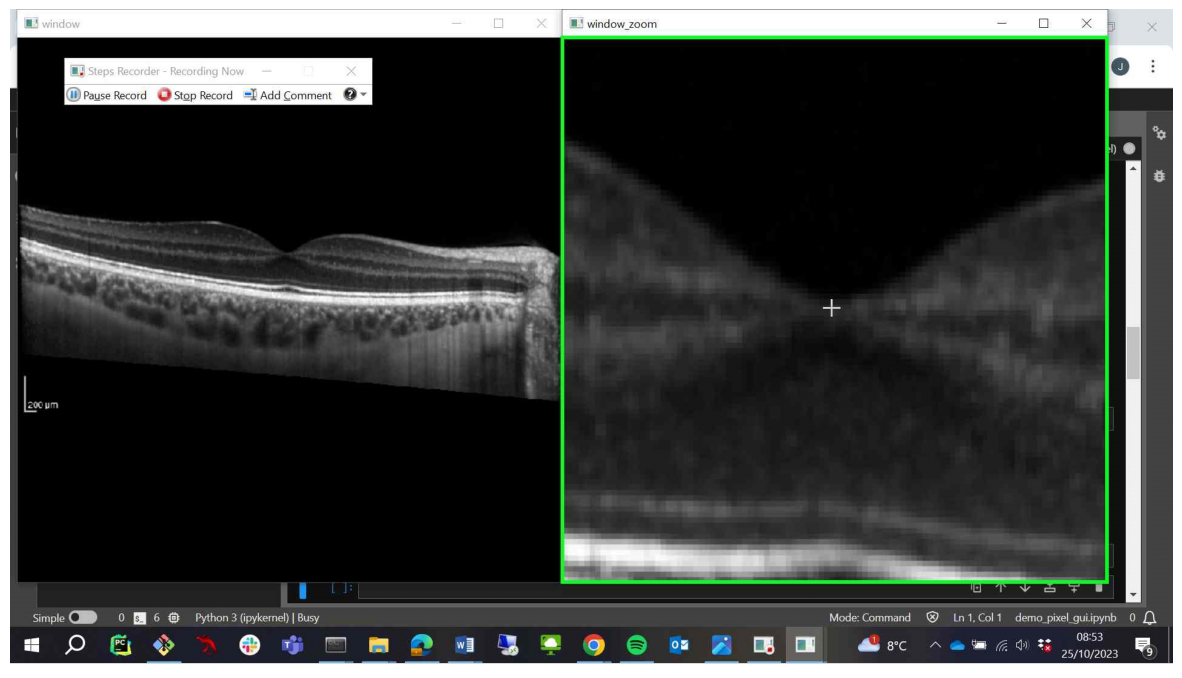

In [7]:
display_gui_fig(img_no=3)

4. We have selected the pixel located at $(379, 305)$, which remains on the screen until we decide to save it (using `ctrl`+`left-click`) or discard it (`right-click`). 

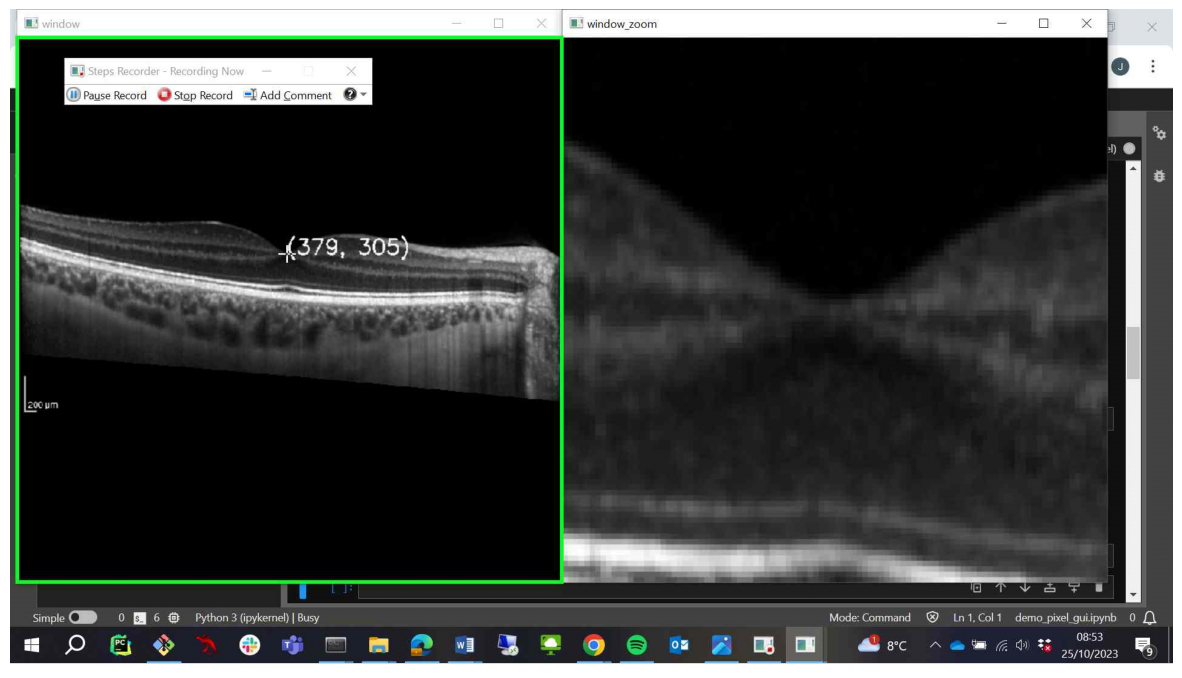

In [8]:
display_gui_fig(img_no=4)

5. As we are happy with our selection, we use `ctrl`+`left-click` to save the pixel to `os.path.join(save_path, fname)` which is just `.../choroid_image_analysis/notebooks/dem_GUI.csv`.
    - **Note** Make sure to *hold* `ctrl`, or else you will end up selecting another pixel by accident.
    - **Note** that the cursor has moved is now hovering over $(287, 237)$, but this coordinate has *not* been selected.

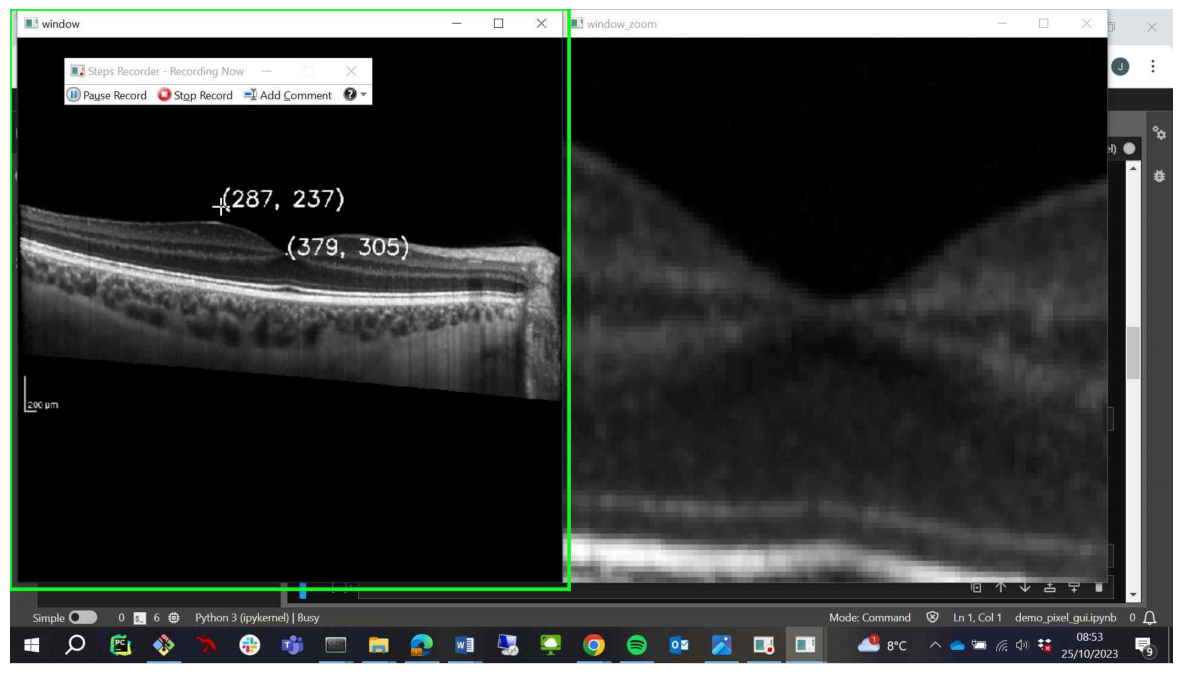

In [9]:
display_gui_fig(img_no=5)

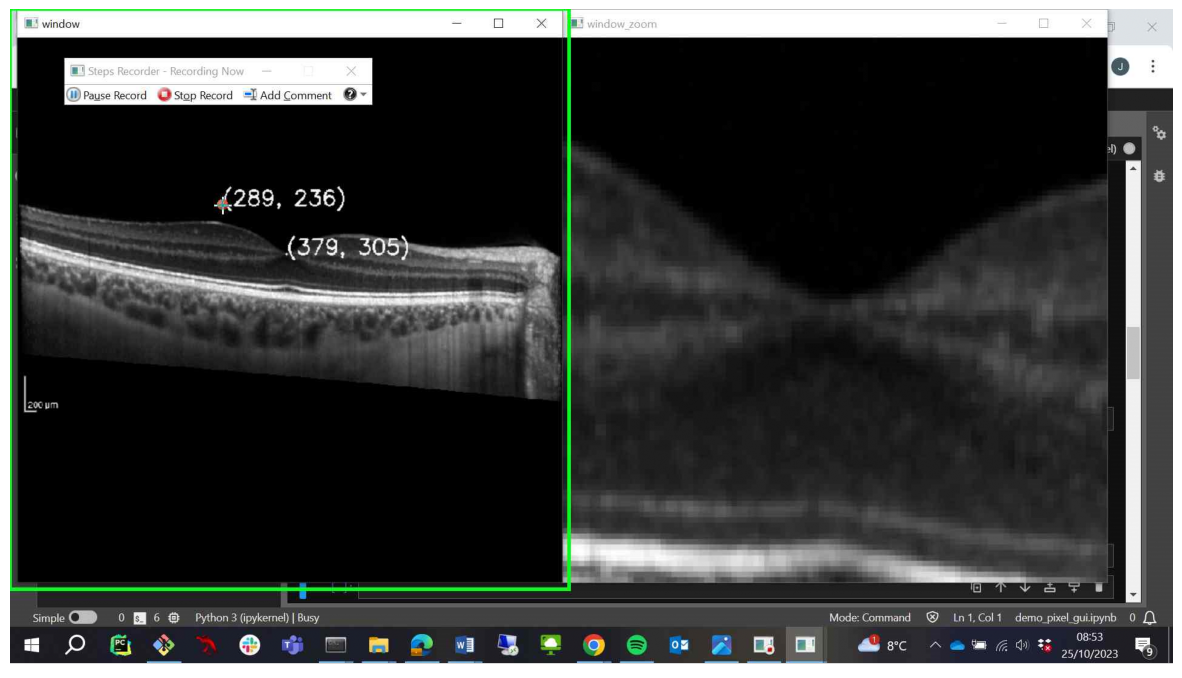

In [14]:
display_gui_fig(img_no=6)

6. We can now escape from the session either using `esc` or `enter`. The cell has now been run and the pixels have been saved, ready to be loaded and used downstream.

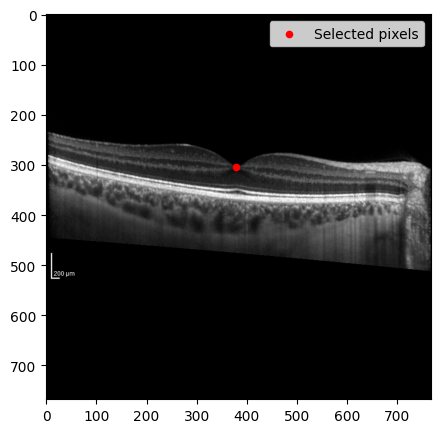

In [12]:
# Load in the selected pixels and plot onto image
load_pixels = pd.read_csv("example_data/demo_GUI.csv").values
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.imshow(image, cmap="gray")
ax.scatter(load_pixels[:,0], load_pixels[:,1], c="r", s=20, label="Selected pixels")
ax.legend()
plt.show()